# Приближенные способы байесовского вывода: вариационный подход


## Cодержание

- Обозначения и важные величины
- Постановка проблемы — латентные переменные
- Вспомним Байеса
- Нижняя оценка обоснованности (ELBO — Evidence Lower Bound )
- Примеры с кодом  для приближения параметров распределений

### Обозначения и важные величины

- Заглавная  $X$ обозначает случайную величину.
  
- Заглавная  $P(X)$ обозначает распределение вероятностей по этой переменной.
  
- Строчная  $x∼P(X)$ обозначает значение $x$, выбранное (∼) из распределения вероятностей $P(X)$ с помощью какого-либо генеративного процесса.
  
- Строчная $p(X)$ — это функция плотности распределения $X$. Это скалярная функция на пространстве меры $X$.
  

- $p(X=x)$ (сокращенно $p(x)$) обозначает функцию плотности, оцененную при конкретном значении $x$.

- Математическое ожидание по $p(x)$ : $\mathbb{E}_{p(x)}[f(x)] = \int f(x) p(x) dx$

- Дивергенция Кульбака-Лейблера между двумя распределениями $p(x)$ и $q(x)$:  $D_{KL}(p(x) | q(x)) = \int p(x) \log \frac{p(x)}{q(x)} dx = \mathbb{E}_{p(x)} \left[ \log \frac{p(x)}{q(x)} \right].$

Во многих  работах термины «переменные», «распределения», «плотности» и даже «модели» используются как взаимозаменяемые, что может запутать, если на это нет привычки.


### Постановка проблемы — латентные переменные

Рассмотрим пример с VAE и автоэнкодером.


<div>
<img src="https://drive.google.com/uc?export=view&id=1fWi9dGUInf4XwwfzuQDt0LtdA21QpEqO" width="500"/>
</div>



В случае с VAE мы могли использовать $MLE$: $L(\theta; X) = P(X | \theta)$ и тогда бы мы решали такую оптимизационную задачу: $\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} \sum_{i=1}^{N} \log P(x_i | \theta)$.

Но теперь у нас есть $Z$ и нам надо как-то посчиать $P(X | \theta) = \int P(X| Z,\theta)P(Z) dZ.$


Представим, что $Z$ многомерна: $Z = (Z_1, Z_2, \ldots, Z_d)$, тогда имеем:

$$P(X | \theta) = \int P(X| Z_1, Z_2, \ldots, Z_d, \theta) P(Z_1, Z_2, \ldots, Z_d) \, dZ_1 \, dZ_2 \, \ldots \, dZ_d =  $$
$$ = \int \cdots \int P(X| Z_1, Z_2, \ldots, Z_d, \theta) P(Z_1, Z_2, \ldots, Z_d) \, dZ_1 \, dZ_2 \, \ldots \, dZ_d$$

И считать это становится не так приятно. **Что делать?**

### Рассмотрим  еще простой пример с камерами и картинками

**Здесь мы попробуем ответить на вопрос, какое $Z$ нам нужно.**

Допустим, у нас есть некоторые изображения, а также есть набор фотокамер.
Мы можем ответить на два вопроса:

- Вероятность фотографии при условии определенной камеры;
- Вероятность камеры при условии снятого изображения.

В этом случае $Z$ — это наша латентная переменная.


<div>
<img src="https://drive.google.com/uc?export=view&id=1RXmIr-_m7jRttvPJGJYl6arT_pZgnDcz" width="800"/>
</div>




**Так как мы сфокусировались на $Z$, давайте посчитаем $P(Z|X)$ из примера выше.**

Допустим, у нас всего три камеры и три категории снимков:

- хороший;
- нормальный;
- плохой.

Вспомним формулу Байеса:

$$P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)},$$

где $P(X) = \sum_{i} P(X|Y_i) \cdot P(Y_i).$

Также нам даны вероятности, с которыми эти камеры делают соотвествующие снимки:

- $P(\text{хорошо} | A) = 0.2, P(плохо∣A)=0.1, 𝑃(нормально∣𝐴)=0.7$
- $P(\text{хорошо}|B)=0.3, P(плохо∣B)=0.3, P(нормально∣B)=0.4$
- $P(\text{хорошо} | C) = 0.3, 𝑃(плохо∣𝐶)=0.5, 𝑃(нормально∣𝐶)=0.2$

При этом вероятность камеры у нас случайная:  $P(A) = P(B) = P(C) = \frac{1}{3}$

Для примера посчитаем верятность только $P(A|хорошо)$, используя формулу Байеса.

$$P(A|\text{хорошо}) = \frac{P(\text{хорошо}|A) \cdot P(A)}{P(\text{хорошо})}.$$



 **Вычислим $P(\text{хорошо}).$**

 Используем формулу полной вероятности:

$$P(\text{хорошо}) = P(\text{хорошо} | A) \cdot P(A) + P(\text{хорошо} | B) \cdot P(B) + P(\text{хорошо} | C) \cdot P(C).$$
  
Подставим значения:
$$P(\text{хорошо}) = (0.2 \cdot \frac{1}{3}) + (0.3 \cdot \frac{1}{3}) + (0.3 \cdot \frac{1}{3})= \frac{0.2}{3} + \frac{0.3}{3} + \frac{0.3}{3} = \frac{0.2 + 0.3 + 0.3}{3} = \frac{0.8}{3} = \frac{8}{30} = \frac{4}{15}.$$
   
 **Вычислим $P(A | \text{хорошо}),$** подставляя в формулу

$$P(A | \text{хорошо}) = \frac{P(\text{хорошо} | A) \cdot P(A)}{P(\text{хорошо})}$$
найденные числовые значения:
$$P(A | \text{хорошо}) = \frac{0.2 \cdot \frac{1}{3}}{\frac{4}{15}} = \frac{0.2 \cdot 15}{4 \cdot 3} = \frac{1}{4}.$$

Мы только что посчитали вероятность того, что снимок был сделан камерой A, при условии, что он был хорошим.

#### Нижняя оценка обоснованности (ELBO — Evidence Lower Bound)

Отлично, мы смогли посчитать $P(Z|X)$ для простого примера, и у нас появилась интуиция для моделей с латентными переменными. Но для более сложного случая мы не сможем проделать аналогичные вычисления, так как у нас будет все тот же интеграл. Тогда $P(Z|X)$ заменим на некоторое $Q(Z)$, так чтобы они были близки друг к другу по KL-дивергенции $KL(Q(Z)||P(Z|X))$.


<div>
<img src="https://drive.google.com/uc?export=view&id=1RnEiJ6rkJYdBRAFwch8soB1eg5mgIko5" width="800"/>
</div>



Таким образом, нам достаточно оптимзировать ELBO или нижнюю оценку обоснованности.

## Проделаем всё то же самое, но чуть по-другому.

**Логарифм правдоподобия $\log P(D)$ можно разложить следующим образом:**

$$ \log P(D) = \log \int P(D, Z) \, dZ. $$

Используя закон полной вероятности, можно переписать $P(D, Z)$ так:

$$ P(D, Z) = P(D|Z) P(Z) .$$

Таким образом, логарифм правдоподобия становится равным

$$ \log P(D) = \log \int P(D|Z) P(Z) \, dZ $$



**Введем вариационное распределение** $Q(Z)$ и умножим подынтегральное выражение на $1 = \frac{Q(Z)}{Q(Z)}$:

$$ \log P(D) = \log \int P(D|Z) P(Z) \frac{Q(Z)}{Q(Z)} \, dZ .$$

Это можно переписать так:

$$ \log P(D) = \log \left( \mathbb{E}_{Z \sim Q(Z)} \left[ \frac{P(D|Z) P(Z)}{Q(Z)} \right] \right). $$

Применим неравенство Йенсена к математическому ожиданию:

$$ \log P(D) \geq \mathbb{E}_{Z \sim Q(Z)} \left[ \log \frac{P(D|Z) P(Z)}{Q(Z)} \right]. $$

Это неравенство дает нам ELBO:

$$ \text{ELBO} = \mathbb{E}_{Z \sim Q(Z)} \left[ \log \frac{P(D|Z) P(Z)}{Q(Z)} \right]. $$

ELBO можно упростить, разделив члены внутри логарифма:

$$ \text{ELBO} = \mathbb{E}_{Z \sim Q(Z)} \left[ \log P(D|Z) + \log P(Z) - \log Q(Z) \right]. $$

Это можно переписать так:

$$ \text{ELBO} = \mathbb{E}_{Z \sim Q(Z)} \left[ \log P(D|Z) \right] - \mathbb{E}_{Z \sim Q(Z)} \left( \log \frac{Q(Z)}{P(Z)} \right) .$$

Второй член является дивергенцией Кульбака—Лейблера (KL):

$$ \text{ELBO} = \mathbb{E}_{Z \sim Q(Z)} \left[ \log P(D|Z) \right] - D_{KL}(Q(Z) || P(Z)) .$$

Итоговое выражение для ELBO:

$$ \text{ELBO} = \mathbb{E}_{Z \sim Q(Z)} \left[ \log P(D|Z) \right] - D_{KL}(Q(Z) || P(Z)) .$$


### Примеры с кодом

In [ ]:
import torch
import numpy as np
from torch import nn
from sklearn import datasets
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

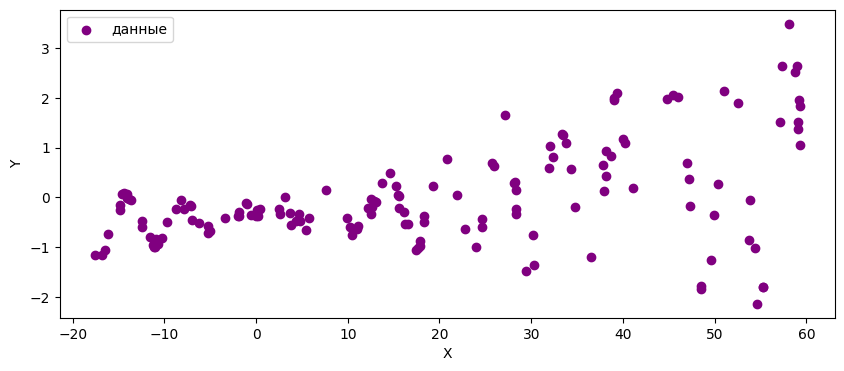

In [ ]:
w0 = 0.125
b0 = 2.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
    np.random.seed(45)

    def s(x):
        g = (x - x_range[0]) / (x_range[1] - x_range[0])
        return 3 * (0.25 + g**2.)

    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    eps = np.random.randn(n) * s(x)
    y = (w0 * x * (1. + 3*np.sin(x)) + b0) + eps
    y = (y - y.mean()) / y.std()
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    return y[:, None], x[:, None]

y, x = load_dataset()


plt.figure(figsize=(10,4))
plt.scatter(x,y, label='данные', c='purple')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

###  Оценка максимального правдоподобия

Сначала мы построим нейронную сеть $g_\theta(x)$ с использованием оценки максимального правдоподобия. При этом мы предполагаем гауссово правдоподобие:

$$y \sim N(g_\theta(x), \sigma^2),$$


$$\hat{\theta}_{\text{MLE}} = \arg\max_\theta \prod_i P(y_i | \theta).$$


In [ ]:
# Go to pytorch world
X = torch.tensor(x, dtype=torch.float)
Y = torch.tensor(y, dtype=torch.float)

class MaximumLikelihood(nn.Module):
    def __init__(self):
        super().__init__()
        self.out = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
    def forward(self, x):
        return self.out(x)

epochs = 200

m = MaximumLikelihood()
optim = torch.optim.Adam(m.parameters(), lr=0.001)

for epoch in range(epochs):
    optim.zero_grad()
    y_pred = m(X)
    loss = (0.5 * (y_pred - Y)**2).mean()
    loss.backward()
    optim.step()

Text(0, 0.5, 'Y')

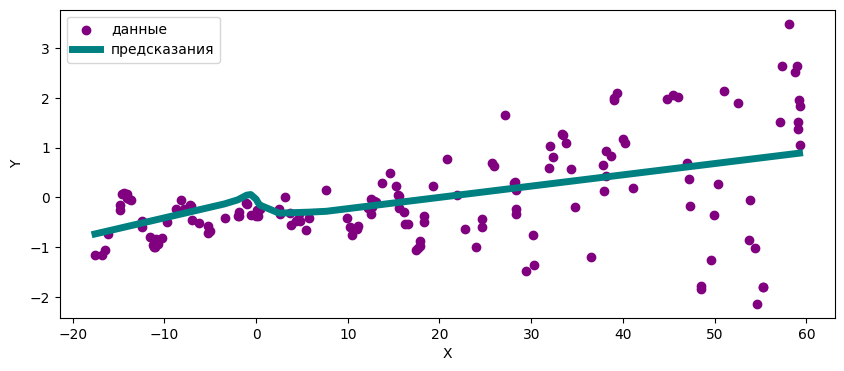

In [ ]:
y_hat = m(X).detach()

plt.figure(figsize=(10,4))
plt.scatter(x,y, label='данные', c='purple')
plt.plot(x,y_hat, label='предсказания', c='teal', linewidth=5)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

### Постановка задачи

Теперь усложним задачу и попробуем посчитать следующее:

$$P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)},$$ где $P(X) = \sum_{i} P(X|Y_i) \cdot P(Y_i).$
Так же как и раньше, мы не можем посчитать $P(Y|X)$ (предположим что не можем, тут у нас простой пример).

Попробуем приблизить его с помощью $Q_{\theta(X)}(Y)$, которое будет зависеть от некоторых параметров $\theta$ и $X$.


#### Также предположим следующее:

$P = \mathcal{N}(0, 1)$ — наше априорное распределение нормальное.

$Q = \mathcal{N}(g_{\theta}(x)_{\mu}, \text{diag}(g_{\theta}(x)_{\sigma^2})))$  — распределение, которым мы будем приближать, зависит от параметров и входных $X$.


Обозначим примеры из распределение $Z \sim Q(y|x)$ через $Z$.

#### По сути мы хотим следующее:

- найти такое $Q,$ из которого можно будет семплирвать $Z$;
- полученные $Z$ будут близки к $Y$, так как мы хотим найти $Q$, которое близко к $Z$;
- $Q$ будет зависеть от параметров $\theta$ и $X$.


Будем максимизировать ELBO и перепишем его для наглядности:

$$\begin{equation}\text{argmax}_{Y} = E_{Z \sim Q} \log [ \frac{P(Y,Z)}{Q(Z)}] = E_{Z \sim Q} \log [ \frac{P(Y|Z)(P(Z))}{Q(Z)}] =  E_{Z \sim Q}[\underbrace{\log P(Y|Z)}_{\text{likelihood}}] - D_{KL}(Q(Z)||\underbrace{P(Z)}_{\text{prior}}) \label{eq:elbo} \end{equation}=$$


$$\begin{equation}E_{Z \sim Q}[\log P(Y|Z] + \int Q(Z) \frac{P(Z)}{Q(Z)}dY \end{equation} = $$

$$\begin{equation} E_{Z \sim Q}[\underbrace{\log P(Y|Z)}_{\text{likelihood}}]  + E_{Z \sim Q}[\log P(Z) - \log Q(Z) ] \end{equation}$$




### Поясним, что нужно сделать для максимизации ELBO в этом случае.

1. Cемплируем некоторое колличество $Z$ из распределения $Q= \mathcal{N}(g_{\theta}(x)_{\mu}, \text{diag}(g_{\theta}(x)_{\sigma^2}))).$  

2. Cчитаем $P(Z)$, до этого мы договорились, что $P= \mathcal{N}(0, 1)$, т.е. считаем вероятность того, что $Z$ из распределения $\mathcal{N}(0, 1)$.

3. Cчитаем $Q(Z)$, то же самое, что и выше, но только для параметров $Q$.

4. Считаем $P(Y|Z),$ так как мы взяли нормальные распределения, это совпадет с расчетом вероятности наблюдать данные $Y$ при условии, что они из нормального распределения.

5. Сложить все и усреднить значения по колличеству примеров $Z,$ которые мы сеплировали, это и будет нашей оценкой матожидания.


Для того, чтобы посчитать логарифмы вероятностей, возьмем логарифм нормального распределения:

\begin{equation} \mathcal{L}(\mu, \sigma, x)= \sum_{i=1}^{n}\log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right) = -\frac{n}{2}\log (2\pi \sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i - \mu)^2 .\end{equation}

### Реализуем всё в коде

In [ ]:
class VI(nn.Module):
    def __init__(self):
        super().__init__()

        self.q_mu = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        self.q_log_var = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def reparameterize(self, mu, log_var):
        # std can not be negative, thats why we use log variance
        sigma = torch.exp(0.5 * log_var) + 1e-5
        eps = torch.randn_like(sigma)
        return mu + sigma * eps

    def forward(self, x):
        mu = self.q_mu(x)
        log_var = self.q_log_var(x)
        return self.reparameterize(mu, log_var), mu, log_var



def ll_gaussian(y, mu, log_var):
    sigma = torch.exp(0.5 * log_var)
    return -0.5 * torch.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2))* (y-mu)**2

def elbo(y_pred, y, mu, log_var):
    # likelihood of observing y given Variational mu and sigma
    likelihood = ll_gaussian(y, mu, log_var)

    # prior probability of y_pred
    log_prior =  ll_gaussian(y_pred, 0, torch.log(torch.tensor(1.)))

    # variational probability of y_pred
    log_p_q = ll_gaussian(y_pred, mu, log_var)

    # by taking the mean we approximate the expectation
    return (likelihood + log_prior - log_p_q).mean()

def det_loss(y_pred, y, mu, log_var):
    return -elbo(y_pred, y, mu, log_var)

###  Обучим модель

In [ ]:
epochs = 1500

m = VI()
optim = torch.optim.Adam(m.parameters(), lr=0.01)

for epoch in range(epochs):
    optim.zero_grad()
    y_pred, mu, log_var = m(X)
    loss = det_loss(y_pred, Y, mu, log_var)
    loss.backward()
    optim.step()

### В качестве бонуса мы теперь можем генерировать новые примеры. Давайте сгенерируем их и построим квантили $0.05$ и $0.95$.

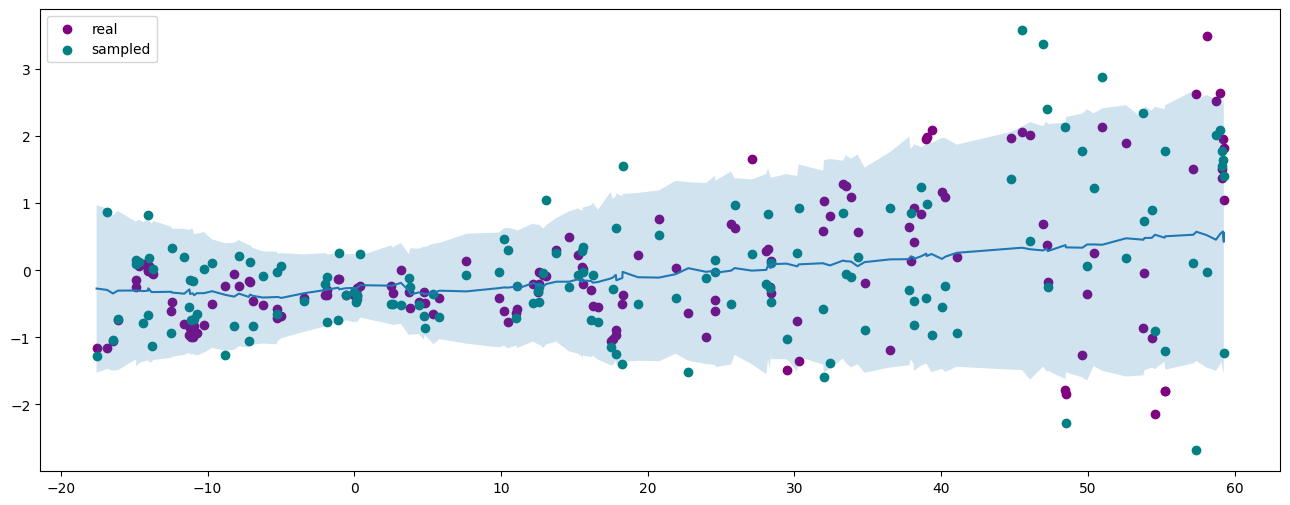

In [ ]:
with torch.no_grad():
    y_pred = torch.cat([m(X)[0] for _ in range(1000)], dim=1)

# Get some quantiles
q1, mu, q2 = np.quantile(y_pred, [0.05, 0.5, 0.95], axis=1)

plt.figure(figsize=(16, 6))
plt.scatter(X, Y, c='purple', label='real')
plt.scatter(X[:,0], y_pred[:,0], c='teal', label='sampled')
plt.plot(X, mu)
plt.fill_between(X.flatten(), q1, q2, alpha=0.2)
plt.legend()